# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [7]:
X_ = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [8]:
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
X_test.head(1)

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978


In [9]:
y_ = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_.head(1)

,,0
,Subject,
0,1,5


In [10]:
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])
y_test.head(1)

,,0
,Subject,
0,2,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=100)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [18]:
importancia = pd.Series(clf.feature_importances_, index = X_train.columns)
importancia.sort_values(ascending = False, inplace = True)
importancia.head(3)

53 tGravityAcc-min()-X                0.282630
382 fBodyAccJerk-bandsEnergy()-1,8    0.254515
560 angle(Y,gravityMean)              0.171064
dtype: float64

In [16]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 4).fit(X_train, y_train)

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [19]:
X_train_cut = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_valid_cut = X_valid[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_cut = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [20]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [21]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 8.72499834e-06, 1.18819807e-05, 1.22476252e-05,
       1.27220264e-05, 1.35732258e-05, 1.44718861e-05, 1.61750434e-05,
       1.64247439e-05, 4.04342029e-05, 4.37757182e-05, 4.46914348e-05,
       4.66345406e-05, 5.15157728e-05, 6.07089600e-05, 6.79032653e-05,
       9.13009089e-05, 1.02975363e-04, 1.05209802e-04, 1.37019360e-04,
       1.62028964e-04, 1.80057796e-04, 1.82944887e-04, 1.99567796e-04,
       2.50381565e-04, 2.88521779e-04, 3.51072513e-04, 3.51399950e-04,
       3.56118310e-04, 3.80765795e-04, 4.23155216e-04, 4.23950370e-04,
       4.39652235e-04, 4.50738329e-04, 4.56635143e-04, 4.59436586e-04,
       4.61909629e-04, 4.96623302e-04, 4.98351324e-04, 5.26134878e-04,
       5.87184924e-04, 5.89721558e-04, 6.40361331e-04, 6.57337940e-04,
       6.95330738e-04, 6.98067847e-04, 7.08635383e-04, 7.24630266e-04,
       7.49133077e-04, 8.15218199e-04, 8.48147630e-04, 9.75661645e-04,
       9.92596071e-04, 1.00315063e-03, 1.03263621e-03, 1.03348526e-03,
      

In [22]:
ccp_alphas = ccp_alphas[::4]
ccp_alphas

array([0.00000000e+00, 1.27220264e-05, 1.64247439e-05, 4.66345406e-05,
       9.13009089e-05, 1.62028964e-04, 2.50381565e-04, 3.56118310e-04,
       4.39652235e-04, 4.61909629e-04, 5.87184924e-04, 6.95330738e-04,
       7.49133077e-04, 9.92596071e-04, 1.06364437e-03, 1.40353351e-03,
       1.68782107e-03, 2.49884313e-03, 3.03345349e-03, 4.65751799e-03,
       4.31255693e-02, 1.86014110e-01])

In [23]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha).fit(X_train_cut, y_train)
    clfs.append(clf)

In [24]:
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_cut, y_valid) for clf in clfs]

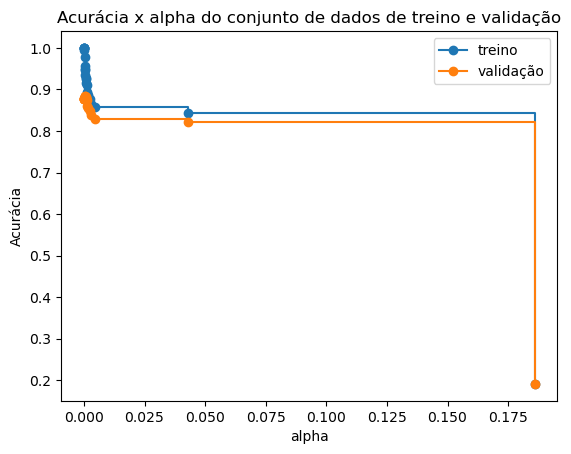

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [26]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.00043965223508205106, random_state=100)

In [27]:
acuracia_valid = melhor_arvore.score(X_valid_cut, y_valid)
print(f'Acurácia: {acuracia_valid*100:.2f}')

Acurácia: 88.41


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

A Árvore teve uma acurácia de 88%, isso é muito bom!!